# Projeto Big Data & Data Mining

## Consumo de propagandas: impacto dos anúncios na decisão de compra dos consumidores

### Imports

In [495]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Armazenamento

In [496]:
df = pd.read_csv("../Data/df_Social_Media_Tratado.csv")
print("Dataset carregado com shape:", df.shape)

Dataset carregado com shape: (300000, 18)


### Análise

#### Informações do csv tratado

In [497]:
print("\n=== Informações gerais do DataFrame ===")
print(df.info())


=== Informações gerais do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Campaign_Goal     300000 non-null  object 
 2   Duration_in_Days  300000 non-null  int64  
 3   Channel_Used      300000 non-null  object 
 4   Conversion_Rate   300000 non-null  float64
 5   Acquisition_Cost  300000 non-null  float64
 6   ROI               300000 non-null  float64
 7   Location          300000 non-null  object 
 8   Language          300000 non-null  object 
 9   Clicks            300000 non-null  int64  
 10  Impressions       300000 non-null  int64  
 11  Engagement_Score  300000 non-null  int64  
 12  Customer_Segment  300000 non-null  object 
 13  Date              300000 non-null  object 
 14  Company           300000 non-null  object 
 15  _Target_Audience  300000 no

#### Estatística

In [498]:
print("\n=== Estatísticas Descritivas ===")
print(df.describe())


=== Estatísticas Descritivas ===
         Campaign_ID  Duration_in_Days  Conversion_Rate  Acquisition_Cost  \
count  300000.000000     300000.000000    300000.000000     300000.000000   
mean   550444.804487         37.500000         0.080009       7753.750796   
std    260252.586037         16.770538         0.040563       4301.035148   
min    100001.000000         15.000000         0.010000        500.000000   
25%    325003.500000         26.250000         0.050000       4121.915000   
50%    551164.500000         37.500000         0.080000       7755.900000   
75%    776284.500000         48.750000         0.110000      11385.075000   
max    999998.000000         60.000000         0.150000      15000.000000   

                 ROI         Clicks    Impressions  Engagement_Score  \
count  300000.000000  300000.000000  300000.000000     300000.000000   
mean        3.177691   18153.670370   56034.236387          4.369217   
std         2.461200   11027.023294   32583.136334      

#### KPIs

In [499]:
# KPI 1: Custo Médio de Aquisição (CPA)
kpi_cpa_mean = df["Acquisition_Cost"].mean()
# KPI 2: Engajamento
kpi_engajamento = df["Engagement_Score"].mean()
# KPI 3: Público dominante
publico_dom = df['_Target_Audience'].mode().iloc[0]
# KPI 4: Idioma frequente
idioma_freq = df['Language'].mode().iloc[0]
# KPI 5: Canal mais utilizado
top_canal = df['Channel_Used'].mode().iloc[0]
# KPI 6: Duração média de uma campanha
duracao_mean = df["Duration_in_Days"].mean()

print("\n=== KPIs do Projeto ===")
print(f"KPI 1 — Custo Médio de Aquisição (CPA): {kpi_cpa_mean:.2f}")
print(f"KPI 2 — Engajamento Médio: {kpi_engajamento:.2f}")
print(f"KPI 3 — Público Dominante: {publico_dom}")
print(f"KPI 4 — Idioma frequente: {idioma_freq}")
print(f"KPI 5 — Canal mais utilizado: {top_canal}")
print(f"KPI 6 — Duração média de uma campanha: {duracao_mean}")


=== KPIs do Projeto ===
KPI 1 — Custo Médio de Aquisição (CPA): 7753.75
KPI 2 — Engajamento Médio: 4.37
KPI 3 — Público Dominante: Women
KPI 4 — Idioma frequente: English
KPI 5 — Canal mais utilizado: Facebook
KPI 6 — Duração média de uma campanha: 37.5


#### ROI x Canal

In [500]:
#ROI médio por canal
Canal_roi = df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)
print("ROI médio por canal:")
print(Canal_roi)

ROI médio por canal:
Channel_Used
Instagram    4.008786
Twitter      4.002236
Facebook     3.986930
Pinterest    0.716431
Name: ROI, dtype: float64


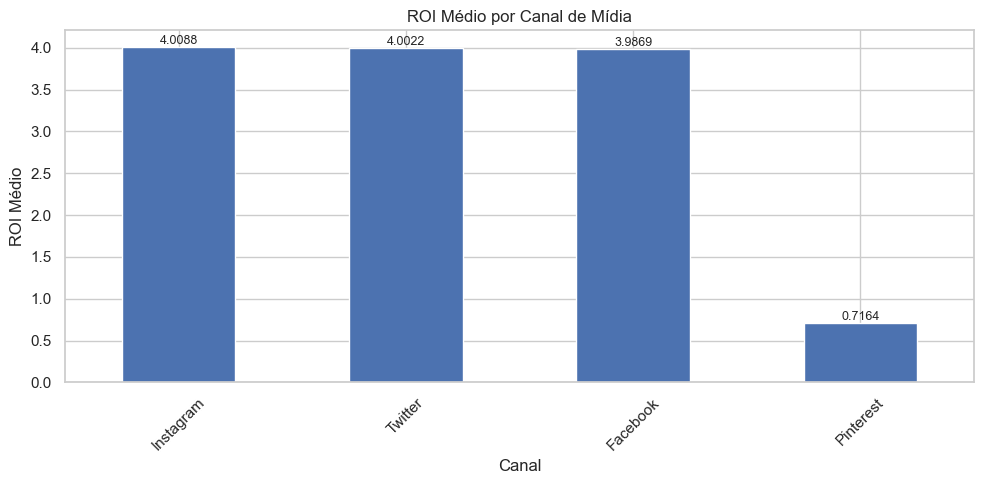

In [501]:
plt.figure(figsize=(10,5))
ax = Canal_roi.plot(kind='bar')

plt.title("ROI Médio por Canal de Mídia")
plt.xlabel("Canal")
plt.ylabel("ROI Médio")
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.4f}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


gráfico de linha

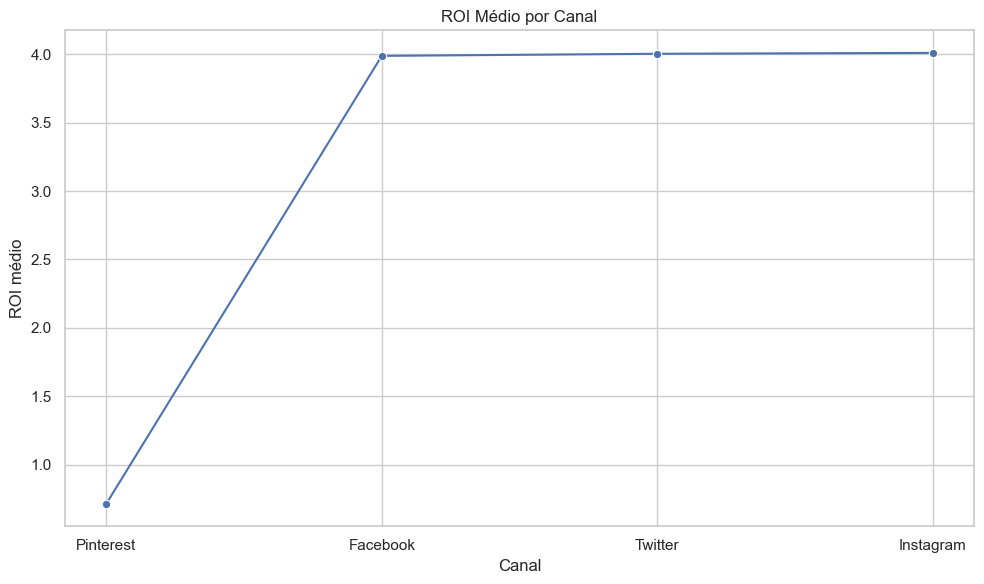

In [502]:
roi_canal = (
    df.groupby("Channel_Used")["ROI"]
    .mean()
    .reset_index()
    .sort_values("ROI")
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=roi_canal,
    x="Channel_Used",
    y="ROI",
    marker="o"
)
plt.title("ROI Médio por Canal")
plt.xlabel("Canal")
plt.ylabel("ROI médio")
plt.tight_layout()
plt.show()


#### Engajamento x Faixa etária x Canal

In [503]:
distinct_idades = pd.DataFrame({
    "Age_Min": sorted(df["Age_Min"].dropna().unique()),
    "Age_Max": sorted(df["Age_Max"].dropna().unique())
})

display(distinct_idades)


,Age_Min,Age_Max
0,18,24
1,25,34
2,35,44
3,45,60


In [504]:
df2 = df.copy()

# Faixa etária com base nas combinações existentes
conditions = [
    (df2["Age_Min"] == 18) & (df2["Age_Max"] == 24),
    (df2["Age_Min"] == 25) & (df2["Age_Max"] == 34),
    (df2["Age_Min"] == 35) & (df2["Age_Max"] == 44),
    (df2["Age_Min"] == 45) & (df2["Age_Max"] == 60)
]

labels = ["18–24", "25–34", "35–44", "45–60"]

df2["Age_Group"] = pd.cut(
    df2["Age_Min"],
    bins=[17, 24, 34, 44, 60],
    labels=labels,
    include_lowest=True
)

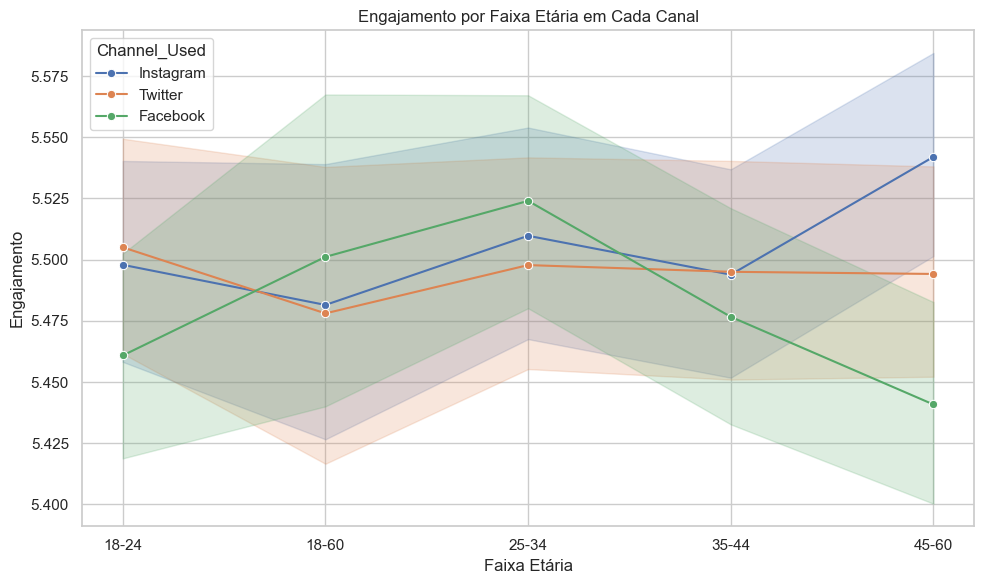

In [505]:
df["Age_Range"] = df["Age_Min"].astype(str) + "-" + df["Age_Max"].astype(str)

# Filtro sem Pinterest por ser de menor engajamento e ordenação pela idade minima
df_no_pinterest = df[df["Channel_Used"] != "Pinterest"]
df_sorted = df_no_pinterest.sort_values("Age_Min")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_sorted,
    x="Age_Range",
    y="Engagement_Score",
    hue="Channel_Used",
    marker="o"
)
plt.title("Engajamento por Faixa Etária em Cada Canal")
plt.xlabel("Faixa Etária")
plt.ylabel("Engajamento")
plt.tight_layout()
plt.show()

#### Engajamento x Segmento Cliente

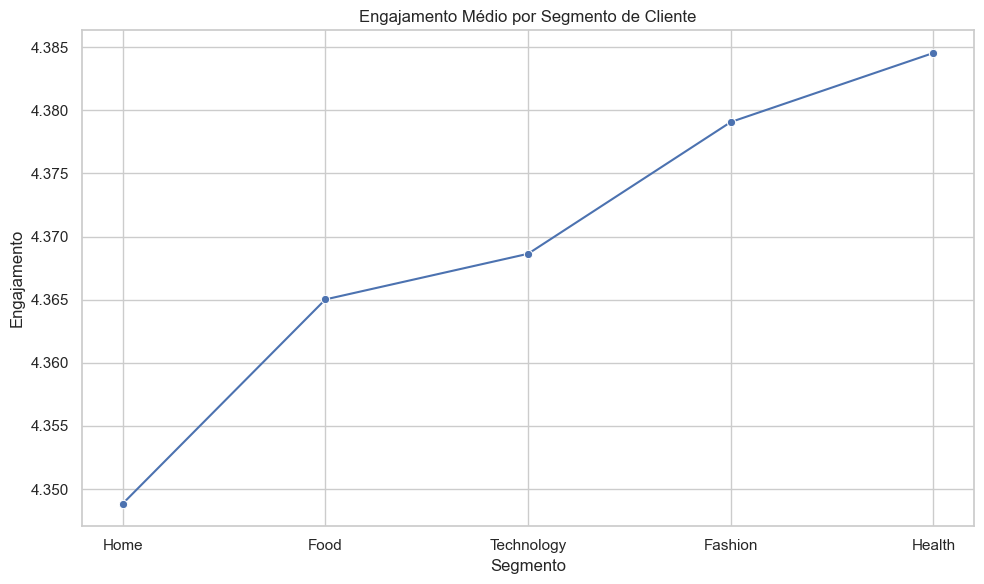

In [506]:
eng_segment = (
    df.groupby("Customer_Segment")["Engagement_Score"]
    .mean()
    .reset_index()
    .sort_values("Engagement_Score")
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=eng_segment,
    x="Customer_Segment",
    y="Engagement_Score",
    marker="o"
)
plt.title("Engajamento Médio por Segmento de Cliente")
plt.xlabel("Segmento")
plt.ylabel("Engajamento")
plt.tight_layout()
plt.show()


In [507]:
# Indicador de média de cliques por segmento de cliente
''' Comment de cliques para calculo interno apenas
cliques_por_segmento = df.groupby('Customer_Segment')['Clicks'].mean().sort_values(ascending=False)
print("Cliques médios por segmento de cliente:")
print(cliques_por_segmento)
'''

'''Cliques médios para apresentação'''
cliques_por_segmento = (
    df.groupby('Customer_Segment')['Clicks']
      .mean()
      .round()
      .astype(int)
      .sort_values(ascending=False)
)

print("Cliques médios por segmento de cliente (valores inteiros):")
print(cliques_por_segmento)

Cliques médios por segmento de cliente (valores inteiros):
Customer_Segment
Fashion       18177
Technology    18174
Home          18153
Health        18142
Food          18123
Name: Clicks, dtype: int64


In [508]:
#Cliques totais por segmento
cliques_total = (
    df.groupby('Customer_Segment')['Clicks']
      .sum()
      .sort_values(ascending=False)
)
print("Soma total de cliques por segmento de cliente:")
print(cliques_total)

Soma total de cliques por segmento de cliente:
Customer_Segment
Home          1090574808
Health        1090097207
Fashion       1089512107
Food          1088394661
Technology    1087522328
Name: Clicks, dtype: int64


#### Matrix de Correlação

Matriz de Correlação:


,Clicks,Impressions,Conversion_Rate,Engagement_Score,Acquisition_Cost,Duration_in_Days,ROI,Age_Min,Age_Max
Clicks,1.000000,0.998769,0.002046,0.200095,0.925816,0.896782,0.188343,-0.000542,-0.000076
Impressions,0.998769,1.000000,0.002054,0.176253,0.943342,0.913744,0.166009,-0.000632,-0.000325
Conversion_Rate,0.002046,0.002054,1.000000,-0.001994,0.002076,0.001047,-0.000249,-0.000997,0.000239
Engagement_Score,0.200095,0.176253,-0.001994,1.000000,-0.002732,-0.002372,0.354717,-0.000673,0.000897
Acquisition_Cost,0.925816,0.943342,0.002076,-0.002732,1.000000,0.965885,-0.001659,-0.001109,-0.001903
Duration_in_Days,0.896782,0.913744,0.001047,-0.002372,0.965885,1.000000,-0.001457,-0.000914,-0.001690
ROI,0.188343,0.166009,-0.000249,0.354717,-0.001659,-0.001457,1.000000,-0.001893,0.002130
Age_Min,-0.000542,-0.000632,-0.000997,-0.000673,-0.001109,-0.000914,-0.001893,1.000000,0.656280
Age_Max,-0.000076,-0.000325,0.000239,0.000897,-0.001903,-0.001690,0.002130,0.656280,1.000000


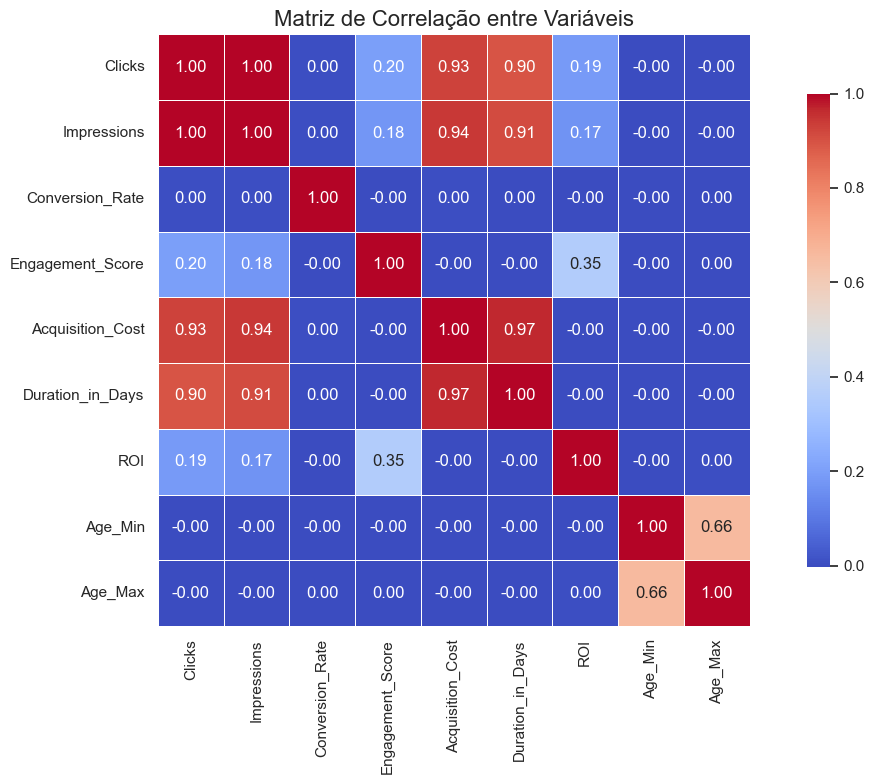


Correlação Clicks ↔ Impressions: 0.9987686003331271
Correlação Conversion_Rate ↔ Engagement_Score: -0.0019939794049703215
Correlação Acquisition_Cost ↔ ROI: -0.0016588288882778736
Correlação Age_Min ↔ Clicks: -0.0005423814359567453
Correlação Age_Max ↔ Clicks: -7.599306973050744e-05


In [509]:
cols_corr = [
    "Clicks", 
    "Impressions", 
    "Conversion_Rate", 
    "Engagement_Score",
    "Acquisition_Cost",
    "Duration_in_Days",
    "ROI",
    "Age_Min",
    "Age_Max"
]
df_corr = df[cols_corr]

# 1. Matriz de correlação

correlation_matrix = df_corr.corr()
print("Matriz de Correlação:")
display(correlation_matrix)

# 2. Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de Correlação entre Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Correlações específicas

print("\nCorrelação Clicks ↔ Impressions:", df["Clicks"].corr(df["Impressions"]))
print("Correlação Conversion_Rate ↔ Engagement_Score:", df["Conversion_Rate"].corr(df["Engagement_Score"]))
print("Correlação Acquisition_Cost ↔ ROI:", df["Acquisition_Cost"].corr(df["ROI"]))
print("Correlação Age_Min ↔ Clicks:", df["Age_Min"].corr(df["Clicks"]))
print("Correlação Age_Max ↔ Clicks:", df["Age_Max"].corr(df["Clicks"]))

In [510]:
# Conclusões dos resultados:
'''
Correlação Clicks X Impressions: Campanhas com mais impressões tendem a receber mais cliques
pois está acompanhando quase proporcionalmente o aumento de cliques.

Correlação Conversion_Rate X Engagement_Score: por estar tão baixo, o engajamento não é neste caso
preditor de conversão, pois mede interações superficiais na propaganda (como os likes ou até o tempo de visualização).
Deve haver um contexto mais específico para a sua predição.

Correlação Acquisition_Cost X ROI: Contraria totalmente o comportamento esperado, mas por se tratar de um cálculo
complexo, ele está diluído por outras variáveis, como tipo de campanha e segmento de cliente por exemplo.

Correlação Age_Min e Age_Max X Clicks: Se mostra praticamente irrelevante, e isso se deve ao dataset limitado a pouca
variabilidade etária.
'''

'\nCorrelação Clicks X Impressions: Campanhas com mais impressões tendem a receber mais cliques\npois está acompanhando quase proporcionalmente o aumento de cliques.\n\nCorrelação Conversion_Rate X Engagement_Score: por estar tão baixo, o engajamento não é neste caso\npreditor de conversão, pois mede interações superficiais na propaganda (como os likes ou até o tempo de visualização).\nDeve haver um contexto mais específico para a sua predição.\n\nCorrelação Acquisition_Cost X ROI: Contraria totalmente o comportamento esperado, mas por se tratar de um cálculo\ncomplexo, ele está diluído por outras variáveis, como tipo de campanha e segmento de cliente por exemplo.\n\nCorrelação Age_Min e Age_Max X Clicks: Se mostra praticamente irrelevante, e isso se deve ao dataset limitado a pouca\nvariabilidade etária.\n'

#### Detecção de Anomalias

In [511]:
#DETECÇÃO DE ANOMALIAS
# valores muito altos de custo de aquisição
limite_superior_ac = df["Acquisition_Cost"].mean() + 2 * df["Acquisition_Cost"].std()
anomalias_ac = df[df["Acquisition_Cost"] > limite_superior_ac]

print("\n=== Anomalias de custo de aquisição ===")
print(anomalias_ac[["Campaign_ID", "Acquisition_Cost"]])


=== Anomalias de custo de aquisição ===
Empty DataFrame
Columns: [Campaign_ID, Acquisition_Cost]
Index: []


#### Ranking de Canal com maior engajamento

In [512]:
# Canal com maior Score de engajamento
engajamento_por_canal = (df.groupby("Channel_Used")["Engagement_Score"].mean().sort_values(ascending=False))
print("\n=== Engajamento médio por canal ===")
print(engajamento_por_canal)

canal_top = engajamento_por_canal.idxmax()
valor_top = engajamento_por_canal.max()
print(f"\nCanal com maior Engagement_Score: {canal_top} ({valor_top:.2f})")



=== Engajamento médio por canal ===
Channel_Used
Instagram    5.507650
Twitter      5.495760
Facebook     5.478394
Pinterest    1.000000
Name: Engagement_Score, dtype: float64

Canal com maior Engagement_Score: Instagram (5.51)


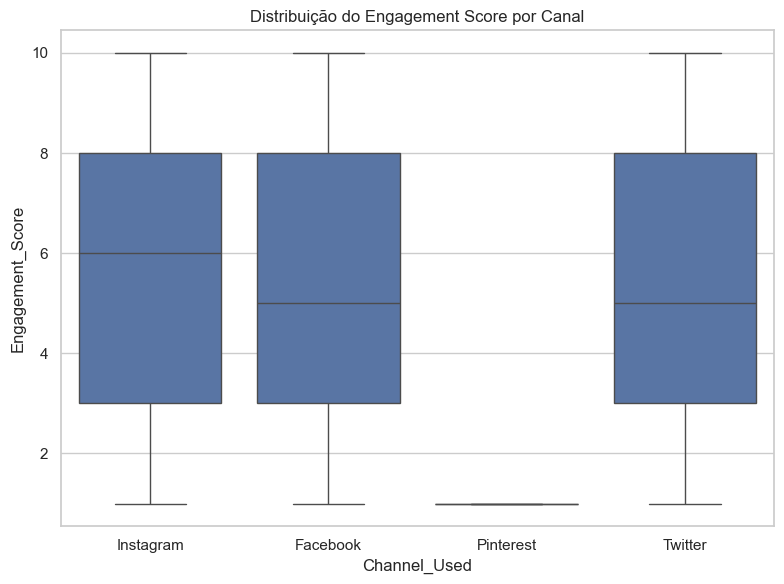

In [513]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Channel_Used", y="Engagement_Score")
plt.title("Distribuição do Engagement Score por Canal")
plt.tight_layout()
plt.show()


#### Análise de naturalidade dos dados

In [514]:
# Comprovação estatistica de dataset com uma variabilidade natural (baixa à extremamente baixa), quase "mudo"/"uniforme", fator pelo qual nenhum gráfico se torna viável a ser plotado no momento
df[["Engagement_Score", "Clicks", "Impressions", 
    "Conversion_Rate", "ROI"]].var()


Engagement_Score    9.963442e+00
Clicks              1.215952e+08
Impressions         1.061661e+09
Conversion_Rate     1.645384e-03
ROI                 6.057507e+00
dtype: float64

### O outro lado do ROI

In [515]:
categorical_cols = [
    "Channel_Used",
    "Location",
    "Language",
    "Customer_Segment",
    "Campaign_Goal",
    "_Target_Audience"
]

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Variáveis categóricas:", categorical_cols)
print("Variáveis numéricas:", num_cols)

Variáveis categóricas: ['Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Campaign_Goal', '_Target_Audience']
Variáveis numéricas: ['Campaign_ID', 'Duration_in_Days', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Age_Min', 'Age_Max']


O canal usado está associado a altos ROIs?
A linguagem influencia a probabilidade de ROI alto?
O público atingido influencia o valor do ROI?
Os segmentos de cliente (casa, saúde, comida, tecnologia e moda) influencam no ROI?

#### importações

In [516]:
#from scipy import stats
#import pingouin as pg

#### Alternativa Teste sentido estatístico

Correlacinando as variáveis categóricas ao ROI sem explodir as colunas (sem one-hot encoding no caso)

In [517]:
#Ferramentas:
'''
ANOVA (se pressupostos ok)
Teste de Kruskal-Wallis (se disribuição não normal)
Tamanho do efeito (n^2 ou epsilon^2)
'''

# O que espero: se o ROI se difere entre categorias e quanto de variação ele é explicado por cada variável

'\nANOVA (se pressupostos ok)\nTeste de Kruskal-Wallis (se disribuição não normal)\nTamanho do efeito (n^2 ou epsilon^2)\n'

##### ROI contínuo ---para--> ROI categorizado

In [518]:
'''
Faixas:
-BAixo ROI
-Médio ROI
-Alto ROI
'''
# Medir Qui-quadrado de independência
# Medir V de Cramer

# Os cálculos vão permitir dizer se as questões anteriores podem ser respondidas

'\nFaixas:\n-BAixo ROI\n-Médio ROI\n-Alto ROI\n'

##### Formula ganho a partir do ROI

In [519]:
# ROI = (ganho - investimento)/(investimento)
# ganho = investimento * (1 + ROI)
df['Gain'] = df['Acquisition_Cost']*( 1 + df['ROI'])
print(df['Gain'])

0           3395.000000
1           4105.000000
2            715.000000
3            954.911786
4           1211.414109
              ...      
299995     89250.000000
299996     66150.000000
299997     28566.917313
299998    126450.000000
299999     43500.000000
Name: Gain, Length: 300000, dtype: float64


In [520]:
# Top 10 campanhas por ganhos
# 5 menores
count = 3
topp_campanhas = df[['Company','Language','Location','Customer_Segment','Gain']].dropna().sort_values('Gain', ascending=True).head(count)
print(topp_campanhas)

# 5 maiores
count = 3
topb_campanhas = df[['Company','Language','Location','Customer_Segment','Gain']].dropna().sort_values('Gain', ascending=False).head(count)
print(topb_campanhas)



           Company Language     Location Customer_Segment   Gain
3371   Tech Titans   French  Los Angeles       Technology  500.0
991    Tech Titans   French        Miami       Technology  500.0
4947  Bistro Bliss   French       Austin             Food  500.0
              Company Language  Location Customer_Segment      Gain
289630  Glam Garments  Spanish     Miami          Fashion  135000.0
298649  Gourmet Grove  English  New York             Food  135000.0
293061  Vogue Visions   French  New York          Fashion  135000.0


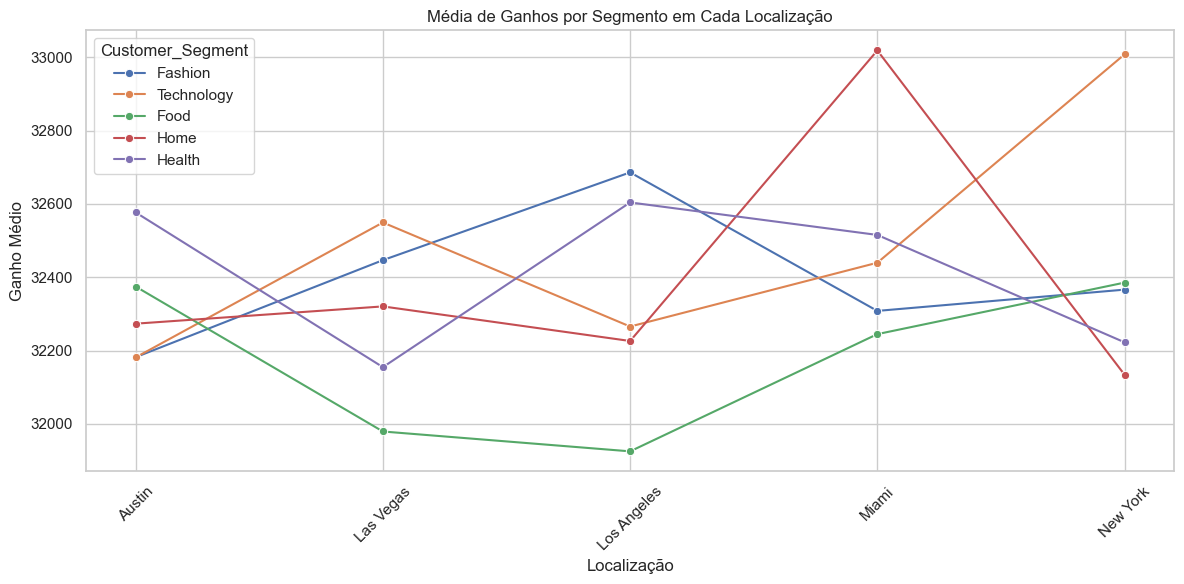

In [521]:
df_grouped = (
    df.groupby(["Customer_Segment", "Location"], as_index=False)
      .agg(Media_Ganho=("Gain", "mean"))
)

df_grouped = df_grouped.sort_values("Location")

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_grouped,
    x="Location",
    y="Media_Ganho",
    hue="Customer_Segment",
    marker="o"
)

plt.title("Média de Ganhos por Segmento em Cada Localização")
plt.xlabel("Localização")
plt.ylabel("Ganho Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0, 32375.218495862642, 'Média Global: 32375.22')

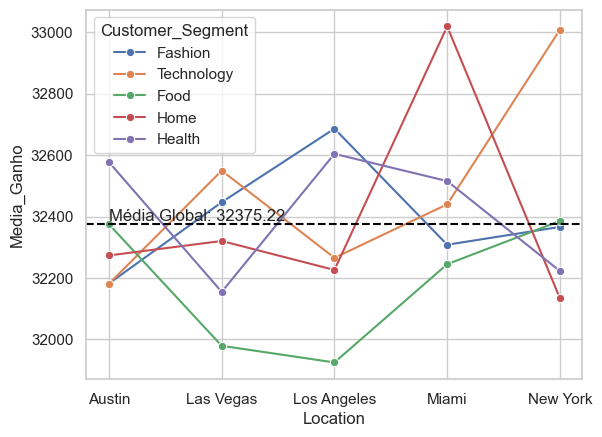

In [522]:
ganho_global = df["Gain"].mean()

ax = sns.lineplot(
    data=df_grouped,
    x="Location",
    y="Media_Ganho",
    hue="Customer_Segment",
    marker="o"
)

ax.axhline(ganho_global, linestyle="--", color="black")
plt.text(0, ganho_global, f"Média Global: {ganho_global:.2f}",
         verticalalignment="bottom")


##### Filtro de campanhas mais relevantes

In [523]:
# 10 campanhas com maiores ROI
top_10_roi = df.nlargest(10, 'ROI')
# 10 campanhas com menores ROI
bottom_10_roi = df.nsmallest(10, 'ROI')

In [524]:
top_10_roi

,Campaign_ID,Campaign_Goal,Duration_in_Days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,_Target_Audience,Age_Min,Age_Max,Age_Range,Gain
673,784555,Brand Awareness,15,Facebook,0.11,500.00,8.0,Las Vegas,French,588,3262,1,Health,2022-03-20,Elixir Essence,Men,45,60,45-60,4500.00
2563,992474,Brand Awareness,15,Facebook,0.15,500.00,8.0,Miami,Spanish,837,3999,9,Home,2022-11-13,Space Spruce,Women,45,60,45-60,4500.00
6059,879341,Product Launch,15,Facebook,0.02,500.00,8.0,Las Vegas,Spanish,1297,5363,3,Fashion,2022-05-24,Attire Artistry,Women,35,44,35-44,4500.00
6162,280607,Increase Sales,15,Instagram,0.06,500.00,8.0,Miami,English,1311,5403,8,Technology,2022-08-17,Tech Titans,Women,18,24,18-24,4500.00
6525,403888,Brand Awareness,15,Instagram,0.06,500.00,8.0,Austin,French,1359,5544,10,Fashion,2022-12-19,Attire Artistry,All Ages,18,60,18-60,4500.00
9461,524327,Market Expansion,15,Instagram,0.11,500.00,8.0,Austin,Spanish,1745,6689,9,Technology,2022-04-24,Silicon Saga,All Ages,18,60,18-60,4500.00
10364,688415,Product Launch,15,Instagram,0.02,500.00,8.0,Austin,Spanish,1864,7041,7,Technology,2022-02-20,Giga Geeks,Women,25,34,25-34,4500.00
12531,265850,Brand Awareness,15,Instagram,0.07,545.05,8.0,Las Vegas,English,2149,7887,3,Home,2022-12-21,Dwell Delight,All Ages,18,60,18-60,4905.45
19193,358813,Increase Sales,15,Instagram,0.05,1089.01,8.0,Miami,Spanish,3027,10485,10,Technology,2022-07-10,NexGen Nerds,All Ages,18,60,18-60,9801.09
20881,392552,Market Expansion,15,Facebook,0.09,1213.81,8.0,New York,English,3249,11143,2,Fashion,2022-01-24,Mode Maven,Men,25,34,25-34,10924.29


In [525]:
bottom_10_roi

,Campaign_ID,Campaign_Goal,Duration_in_Days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,_Target_Audience,Age_Min,Age_Max,Age_Range,Gain
338,593515,Increase Sales,15,Twitter,0.01,500.00,0.0,Los Angeles,English,544,3131,5,Technology,2022-12-03,NexGen Nerds,Men,45,60,45-60,500.00
991,151686,Brand Awareness,15,Twitter,0.08,500.00,0.0,Miami,French,630,3386,8,Technology,2022-12-04,Tech Titans,Men,35,44,35-44,500.00
3371,554755,Increase Sales,15,Facebook,0.04,500.00,0.0,Los Angeles,French,943,4314,10,Technology,2022-09-04,Tech Titans,Women,35,44,35-44,500.00
4947,282734,Increase Sales,15,Pinterest,0.02,500.00,0.0,Austin,French,676,3182,1,Food,2022-09-29,Bistro Bliss,Men,45,60,45-60,500.00
9887,289076,Increase Sales,15,Twitter,0.01,500.00,0.0,Austin,English,1801,6855,8,Fashion,2022-01-13,Glam Garments,Men,45,60,45-60,500.00
10638,148292,Market Expansion,15,Pinterest,0.15,500.00,0.0,Las Vegas,French,1115,4615,1,Home,2022-02-20,Hearth Harmony,All Ages,18,60,18-60,500.00
14782,455333,Brand Awareness,15,Pinterest,0.08,753.23,0.0,Los Angeles,English,1436,5658,1,Technology,2022-12-31,Silicon Saga,Men,18,24,18-24,753.23
18173,840565,Product Launch,15,Pinterest,0.02,1015.92,0.0,Las Vegas,Spanish,1698,6512,1,Fashion,2022-12-03,Silk & Style,Women,45,60,45-60,1015.92
21302,406690,Increase Sales,15,Twitter,0.08,1243.49,0.0,Miami,Spanish,3304,11307,9,Technology,2022-03-24,Silicon Saga,Women,45,60,45-60,1243.49
21564,545405,Product Launch,15,Instagram,0.03,1262.11,0.0,New York,Spanish,3339,11409,7,Home,2022-04-21,Living Luxe,Men,45,60,45-60,1262.11


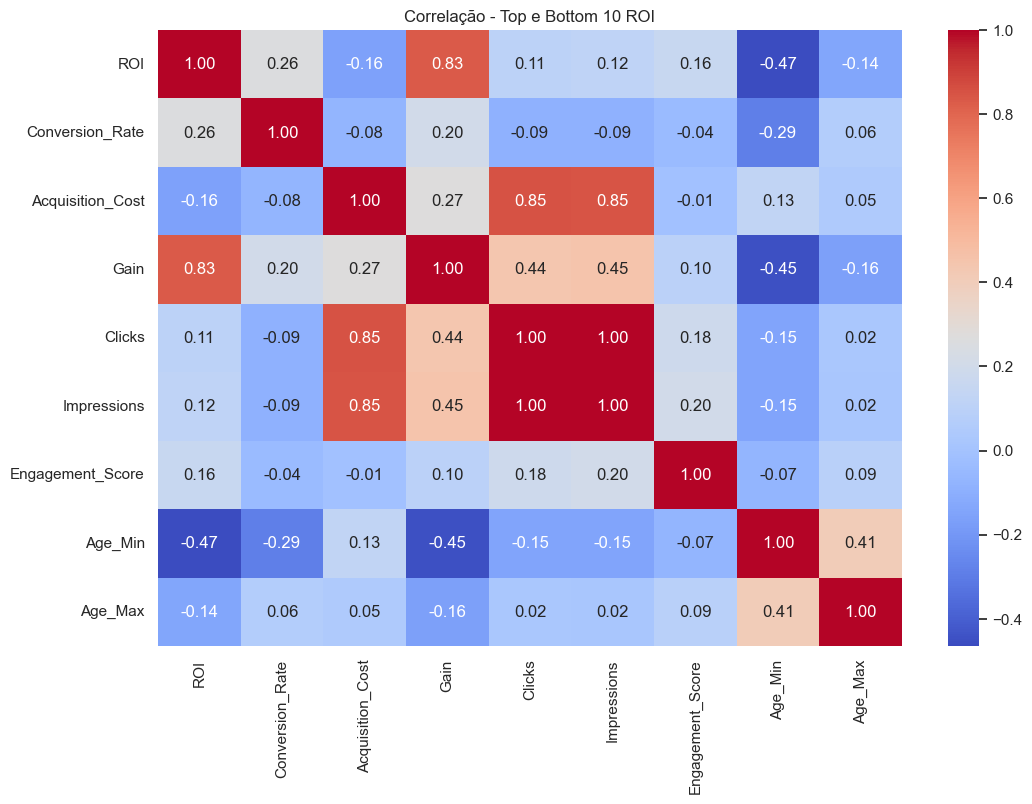

In [526]:
combined_df = pd.concat([top_10_roi, bottom_10_roi])
numeric_cols = ['ROI', 'Conversion_Rate', 'Acquisition_Cost', 'Gain', 'Clicks', 'Impressions', 'Engagement_Score', 'Age_Min', 'Age_Max']
corr_combined = combined_df[numeric_cols].corr()
#print("Nova Matriz de correlação - baseada 20 registros")
#print(corr_combined)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação - Top e Bottom 10 ROI")
plt.show()


#### Faturamento

##### por período

In [527]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

faturamento_mensal = (
    df.groupby(pd.Grouper(key="Date", freq="M"))["Gain"]
    .sum()
    .reset_index()
)
faturamento_anual = (
    df.groupby(pd.Grouper(key="Date", freq="Y"))["Gain"]
    .sum()
    .reset_index()
)

C:\Users\Cleitin\AppData\Local\Temp\ipykernel_236\3848605115.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="Date", freq="M"))["Gain"]
C:\Users\Cleitin\AppData\Local\Temp\ipykernel_236\3848605115.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.groupby(pd.Grouper(key="Date", freq="Y"))["Gain"]


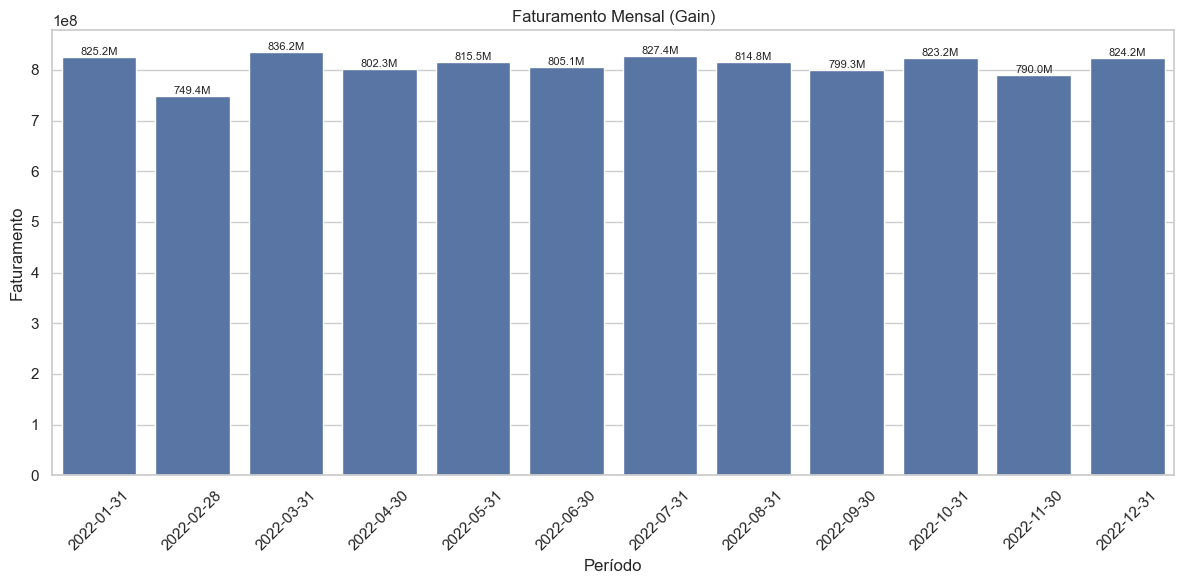

In [528]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=faturamento_mensal, x="Date", y="Gain")

plt.title("Faturamento Mensal (Gain)")
plt.xlabel("Período")
plt.ylabel("Faturamento")
plt.xticks(rotation=45)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                f"{bar.get_height()/1e6:.1f}M",
                ha='center', va='bottom', fontsize=8
            )

plt.tight_layout()
plt.show()


In [529]:
print(df['Date'].unique())
print(df['Date'].isna().sum())


<DatetimeArray>
['2022-02-25 00:00:00', '2022-05-12 00:00:00', '2022-06-19 00:00:00',
 '2022-09-08 00:00:00', '2022-08-24 00:00:00', '2022-01-15 00:00:00',
 '2022-10-30 00:00:00', '2022-07-23 00:00:00', '2022-08-14 00:00:00',
 '2022-03-23 00:00:00',
 ...
 '2022-07-04 00:00:00', '2022-11-01 00:00:00', '2022-07-31 00:00:00',
 '2022-09-13 00:00:00', '2022-04-05 00:00:00', '2022-03-04 00:00:00',
 '2022-05-16 00:00:00', '2022-12-18 00:00:00', '2022-06-24 00:00:00',
 '2022-08-25 00:00:00']
Length: 365, dtype: datetime64[ns]
0


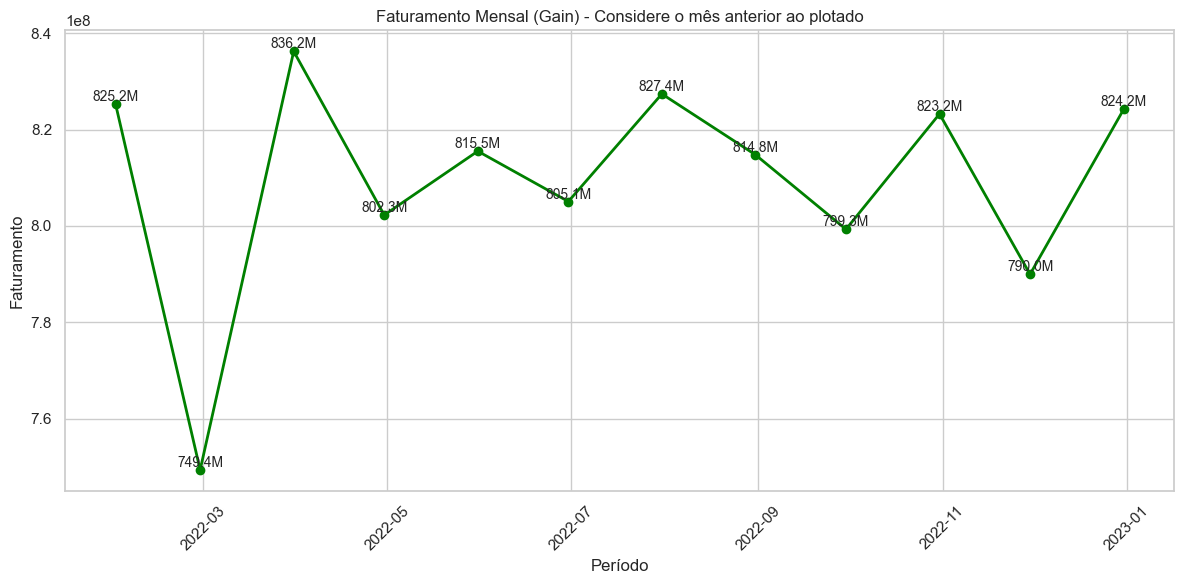

In [530]:
plt.figure(figsize=(12, 6))
plt.plot(
    faturamento_mensal["Date"],
    faturamento_mensal["Gain"],
    marker='o',
    linewidth=2,
    color='green'
)
for x, y in zip(faturamento_mensal["Date"], faturamento_mensal["Gain"]):
    plt.text(
        x, y,
        f"{y/1e6:.1f}M",
        ha='center', va='bottom', fontsize=10
    )
plt.title("Faturamento Mensal (Gain) - Considere o mês anterior ao plotado")
plt.xlabel("Período")
plt.ylabel("Faturamento")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [531]:
# Ordenar por segurança
faturamento_mensal = faturamento_mensal.sort_values("Date").reset_index(drop=True)
faturamento_mensal["Variacao_Abs"] = faturamento_mensal["Gain"].diff()
faturamento_mensal["Variacao_Perc"] = faturamento_mensal["Gain"].pct_change() * 100

faturamento_mensal


,Date,Gain,Variacao_Abs,Variacao_Perc
0,2022-01-31,8.252219e+08,NaN,NaN
1,2022-02-28,7.493763e+08,-7.584556e+07,-9.190929
2,2022-03-31,8.362355e+08,8.685919e+07,11.590864
3,2022-04-30,8.022642e+08,-3.397133e+07,-4.062412
4,2022-05-31,8.155197e+08,1.325554e+07,1.652266
5,2022-06-30,8.050709e+08,-1.044883e+07,-1.281248
6,2022-07-31,8.273957e+08,2.232488e+07,2.773033
7,2022-08-31,8.147722e+08,-1.262354e+07,-1.525696
8,2022-09-30,7.993066e+08,-1.546556e+07,-1.898145
9,2022-10-31,8.232484e+08,2.394173e+07,2.995312


##### por segmento de cliente x cidade

In [532]:
df["Month"] = df["Date"].dt.to_period("M").dt.to_timestamp()

faturamento_cidade_segmento = (
    df.groupby(["Location", "Customer_Segment", "Month"])["Gain"]
    .sum()
    .reset_index()
)


In [533]:
top_fat_cidade = (
    df.groupby("Location")["Gain"]
    .sum()
    .nlargest(1)
    .index
)
top_ROI_cidade = (
    df.groupby("Location")["ROI"]
    .sum()
    .nlargest(1)
    .index
)
top_cost_cidade = (
    df.groupby("Location")["Acquisition_Cost"]
    .sum()
    .nlargest(1)
    .index
)
print("Top cidade melhor ROI:",top_ROI_cidade)
print("Top cidade maior Faturamento:",top_fat_cidade)
print("Top cidade maior Gasto:",top_cost_cidade)

Top cidade melhor ROI: Index(['Miami'], dtype='object', name='Location')
Top cidade maior Faturamento: Index(['Miami'], dtype='object', name='Location')
Top cidade maior Gasto: Index(['Miami'], dtype='object', name='Location')


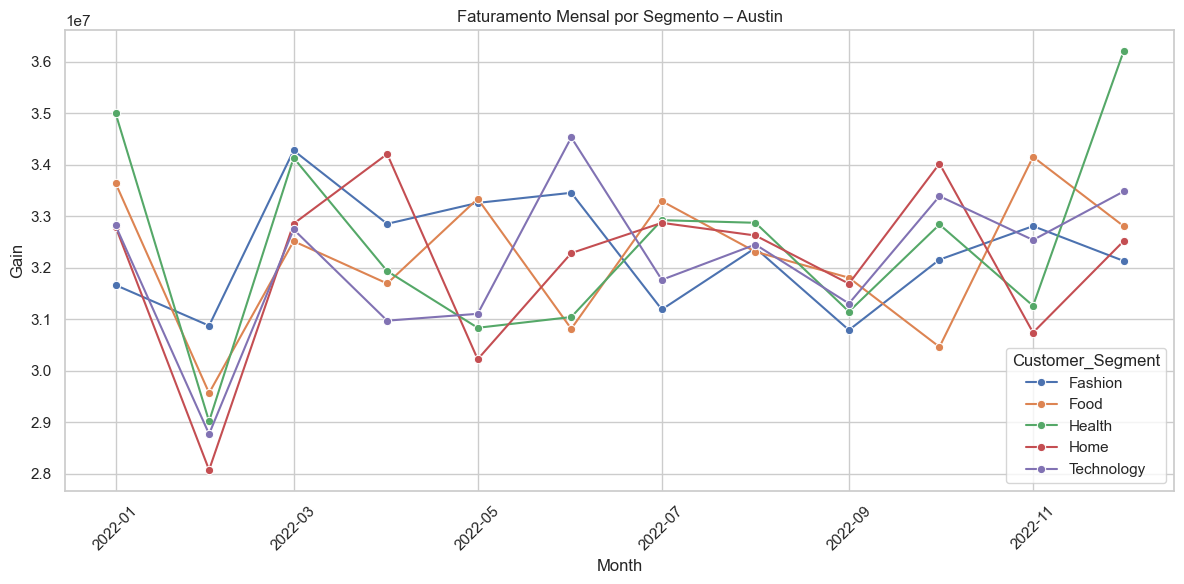

In [534]:
cidade = "Austin"
dados_city = faturamento_cidade_segmento[faturamento_cidade_segmento["Location"] == cidade]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=dados_city,
    x="Month",
    y="Gain",
    hue="Customer_Segment",
    marker="o"
)
plt.title(f"Faturamento Mensal por Segmento – {cidade}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


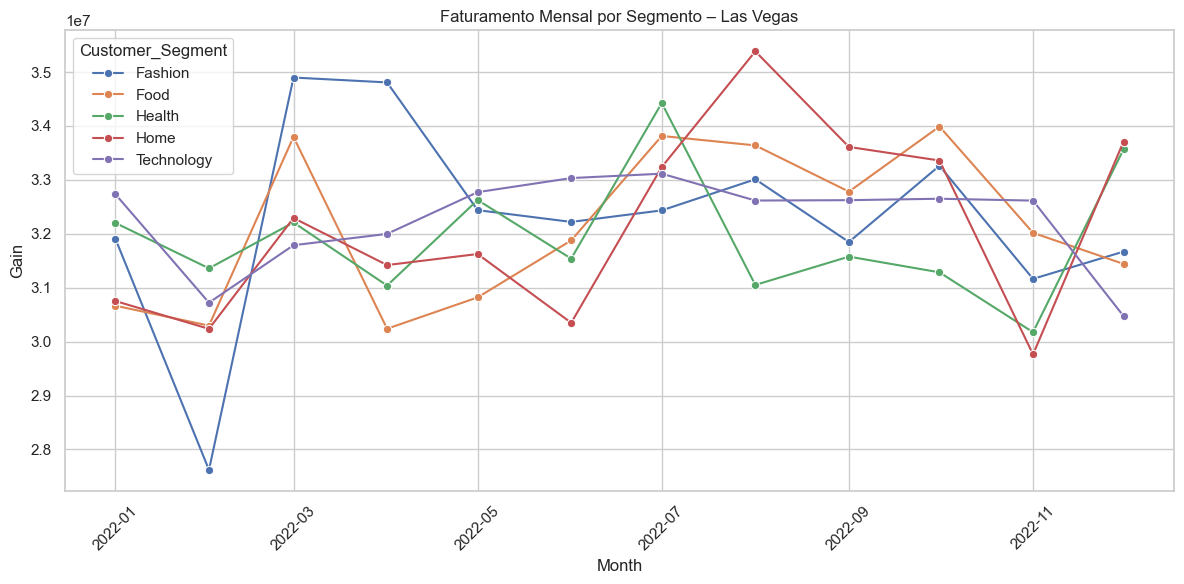

In [535]:
cidade = "Las Vegas"
dados_city = faturamento_cidade_segmento[faturamento_cidade_segmento["Location"] == cidade]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=dados_city,
    x="Month",
    y="Gain",
    hue="Customer_Segment",
    marker="o"
)
plt.title(f"Faturamento Mensal por Segmento – {cidade}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


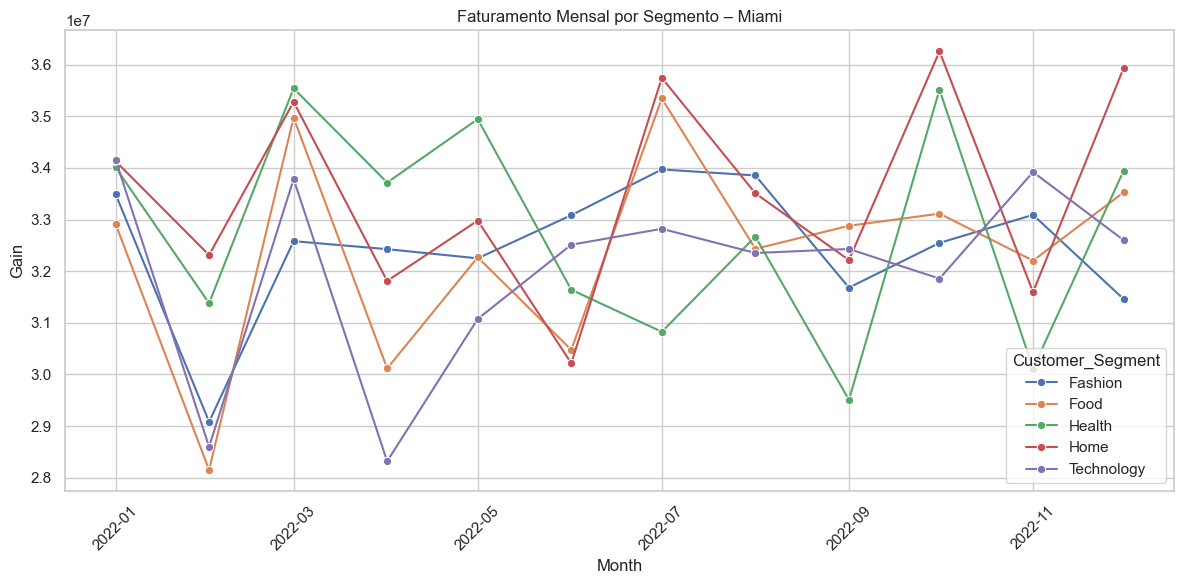

In [536]:
cidade = "Miami"
dados_city = faturamento_cidade_segmento[faturamento_cidade_segmento["Location"] == cidade]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=dados_city,
    x="Month",
    y="Gain",
    hue="Customer_Segment",
    marker="o"
)
plt.title(f"Faturamento Mensal por Segmento – {cidade}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


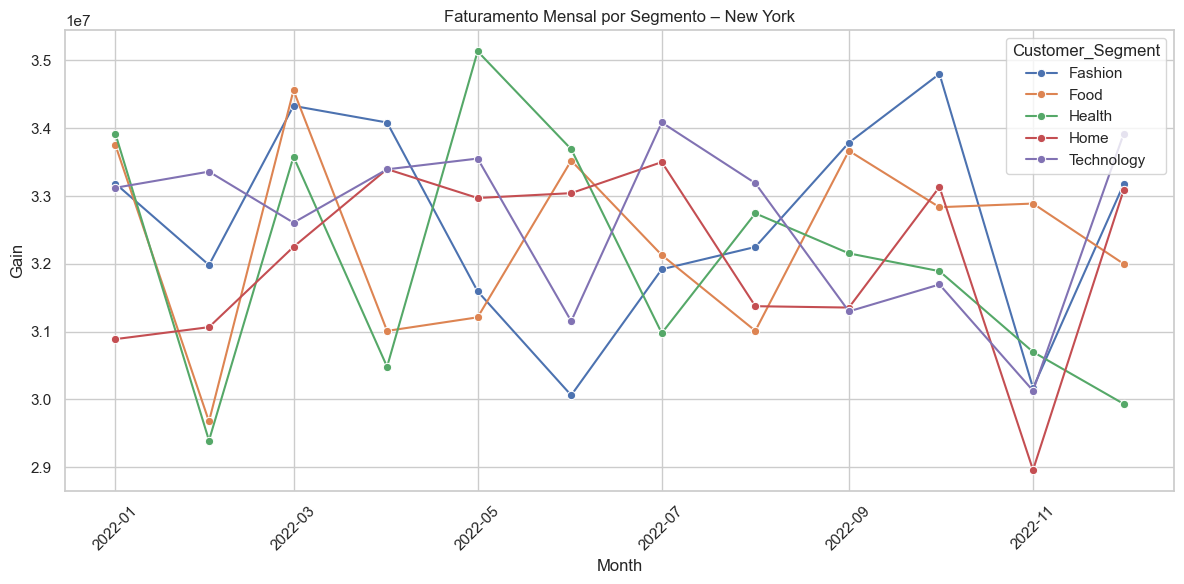

In [537]:
cidade = "New York"
dados_city = faturamento_cidade_segmento[faturamento_cidade_segmento["Location"] == cidade]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=dados_city,
    x="Month",
    y="Gain",
    hue="Customer_Segment",
    marker="o"
)
plt.title(f"Faturamento Mensal por Segmento – {cidade}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Por companhia

In [538]:
topN_companies = (
    df.groupby("Company")["Gain"]
    .sum()
    .nlargest(2)
    .index
)
topN_companies

Index(['Space Spruce', 'Balance Beam'], dtype='object', name='Company')

In [539]:
df_topN = df[df["Company"].isin(topN_companies)]
faturamento_companhia_segmento = (
    df_topN.groupby(["Company", "Customer_Segment"])["Gain"]
    .sum()
    .reset_index()
)
# Agrupa por rede social e soma o faturamento (Gain)
faturamento_por_rede = df_topN.groupby("Channel_Used")["Gain"].sum().reset_index()
faturamento_por_rede = faturamento_por_rede.sort_values("Gain", ascending=False)
print(faturamento_por_rede)


  Channel_Used          Gain
0     Facebook  1.220208e+08
1    Instagram  1.216910e+08
3      Twitter  1.205096e+08
2    Pinterest  4.063964e+07


Faturamento por rede social - Space Spruce (em milhões):

  Channel_Used  Gain_Milhoes
0     Facebook     62.771469
1    Instagram     60.326975
3      Twitter     59.277250
2    Pinterest     20.555913 



C:\Users\Cleitin\AppData\Local\Temp\ipykernel_236\2069784124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=faturamento_rede, x="Channel_Used", y="Gain_Milhoes", palette="viridis")


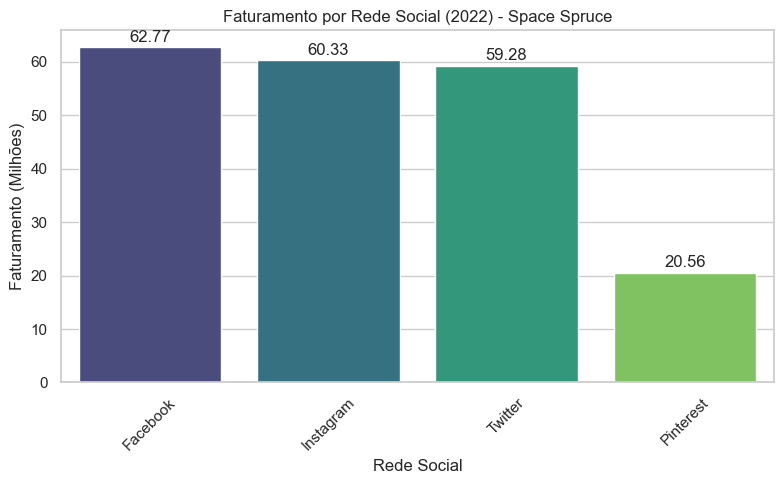

Faturamento por rede social - Balance Beam (em milhões):

  Channel_Used  Gain_Milhoes
1    Instagram     61.363992
3      Twitter     61.232337
0     Facebook     59.249376
2    Pinterest     20.083732 



C:\Users\Cleitin\AppData\Local\Temp\ipykernel_236\2069784124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=faturamento_rede, x="Channel_Used", y="Gain_Milhoes", palette="viridis")


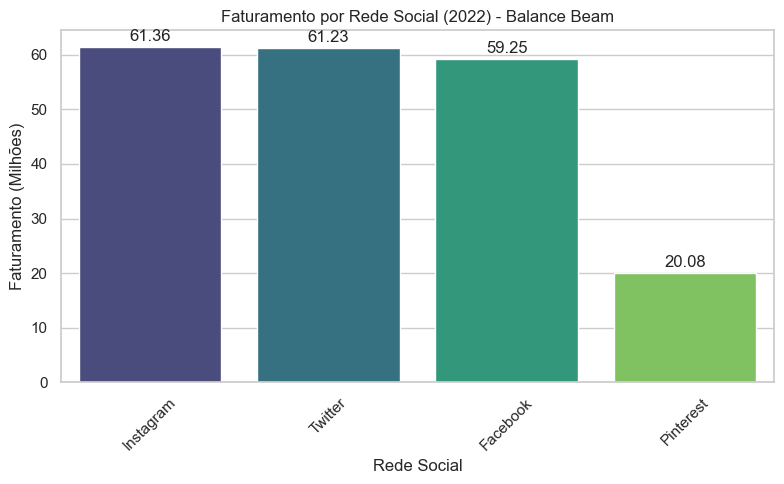

In [540]:
# Lista das top 2 empresas
topN_empresas = df_topN["Company"].unique()
for empresa in topN_empresas:
    faturamento_rede = (
        df_topN[df_topN["Company"] == empresa]
        .groupby("Channel_Used")["Gain"]
        .sum()
        .reset_index()
        .sort_values("Gain", ascending=False)
    )
    
    faturamento_rede["Gain_Milhoes"] = faturamento_rede["Gain"] / 1_000_000
    
    print(f"Faturamento por rede social - {empresa} (em milhões):\n")
    print(faturamento_rede[["Channel_Used", "Gain_Milhoes"]], "\n")
    
    plt.figure(figsize=(8,5))
    ax = sns.barplot(data=faturamento_rede, x="Channel_Used", y="Gain_Milhoes", palette="viridis")
    plt.title(f"Faturamento por Rede Social (2022) - {empresa}")
    plt.ylabel("Faturamento (Milhões)")
    plt.xlabel("Rede Social")
    plt.xticks(rotation=45)

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{height:.2f}',
            ha='center', va='bottom'
        )

    plt.tight_layout()
    plt.show()

